In [1]:
import pandas
import os
import itertools
import numpy as np
import nibabel as ni
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection, linear_model
from nilearn import image, plotting
from mpl_toolkits.mplot3d import Axes3D

/home/users/jvogel/anaconda2/envs/Hipp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/users/jvogel/anaconda2/envs/Hipp/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import warnings
warnings.filterwarnings('ignore')

Insert the git directory associated with these notebooks below, and import the scripts

In [3]:
# Your git directory here:
git_dir = '/home/users/jvogel/git/Hippocampus_AP_Axis/'

import sys
sys.path.insert(0,git_dir)
import HAP_Utils as hap

# Get hippocampus gene expression data (X)
Note: The spreadheets below are generated in N1, or in the case of "probes", are straight from the Allen Brain Atlas dataset

In [4]:
wdir = os.path.join(git_dir, 'Data')
aba_dir = '/data1/users/jvogel/Allen_Human_Brain_Atlas/'

df = pandas.read_csv(os.path.join(wdir,'MAIN_hippocampus_sample_info.csv'))
xp = pandas.read_csv(os.path.join(wdir,'MAIN_hippocampus_gxp.csv'),index_col=0)
gdf = pandas.read_csv(os.path.join(wdir,'MAIN_gcx_wholebrain_info.csv'))
probes = pandas.read_csv(os.path.join(aba_dir,'normalized_microarray_donor9861/Probes.csv'))

# Get location of samples along axis
Note: The hippocampal skeleton used below was obtained by using minc-tools to perform something of a medial axis transform. The exact script used to perform this transformation can be found inside of this git repository. It is called: 

"hipp_medial_axis_transform.sh"

The output of the script can be found in the Data/ directory, and is called "blob_line_skel_1mm_2nii.nii.gz"

Let's visualize the longitudinal axis of the hippocampus that we derived on a template brain

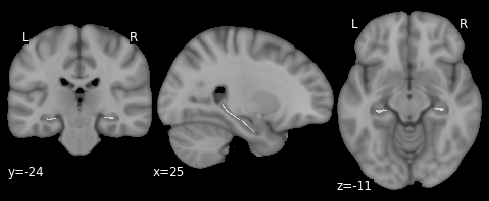

In [5]:
# VIEW HIPPOCAMPUS AXIS

ap_axis = ni.load(os.path.join(wdir,'blob_line_skel_1mm_2nii.nii.gz'))
mni = ni.load(os.path.join(wdir,'MNI152_T1_1mm_brain.nii.gz'))
plt.close()
plotting.plot_roi(ap_axis, mni, draw_cross=False, cmap='Reds')
plt.show()

Here, we find the closest axis coordinate to each hippocampus sample

In [6]:
# Get the MNI coordinates of each sample and convert them to XYZ
sample_coords = []
for i,row in df.iterrows():
    sample_coords.append(hap.convert_coords([row['mni_nlin_x'], 
                                             row['mni_nlin_y'], 
                                             row['mni_nlin_z']], 
                                            'xyz'))

# Get the coordinates of each skeleton voxel
skel_coords = np.where(ap_axis.get_data() > 0)

# find the closest coordinates
y_location, closest_points = hap.find_closest_point_along_axis(sample_coords,skel_coords)

# store this data in the spreadsheet
df.loc[:,'position_along_hipp_AP_axis'] = y_location

# save it
df.to_csv(os.path.join(wdir,'MAIN_hippocampus_sample_info.csv'))

# Run main LASSO-PCR analysis pipeline and evaluate

running PCA
transforming data
performing model cross-validation
using basic 10-fold cross-validation


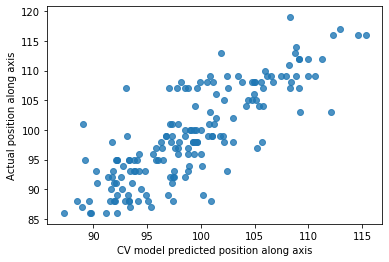

model cv score: r2 =  0.6758859774822009
running final model
final model fit r2 =  0.8768105093258057


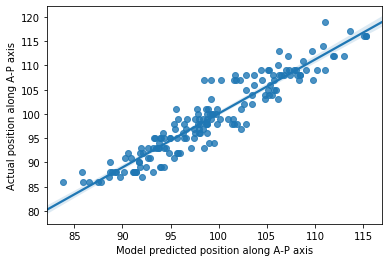

running sanity_check


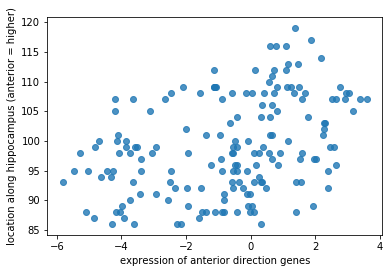

anterior 1 genes vs. y:  r2 = 0.14629196014520193, p = 2.6436230016675347e-07 




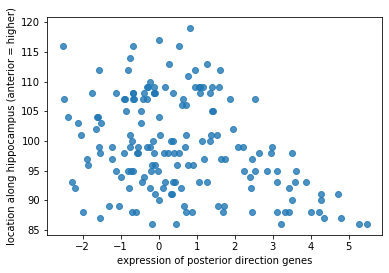

posterior 1 genes vs. y:  r2 = 0.12083902318757658, p = 3.4067482313368583e-06 




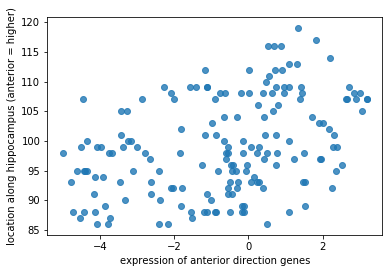

anterior 2 genes vs. y:  r2 = 0.15681046319903022, p = 9.033761155250366e-08 




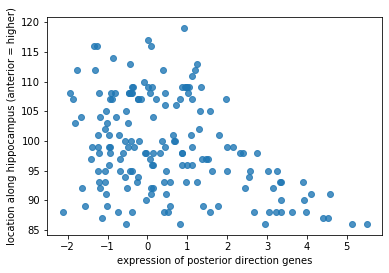

posterior 2 genes vs. y:  r2 = 0.14078245533337308, p = 4.6198060576312595e-07 




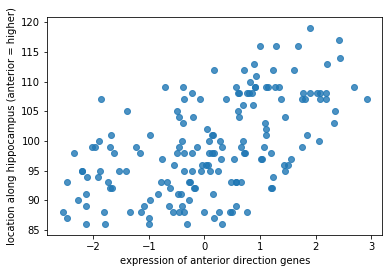

anterior 5 genes vs. y:  r2 = 0.31202764128468763, p = 2.4662826207105813e-15 




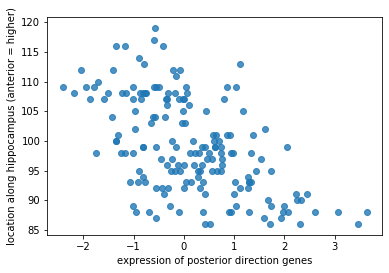

posterior 5 genes vs. y:  r2 = 0.3088720843951693, p = 3.640128882095288e-15 




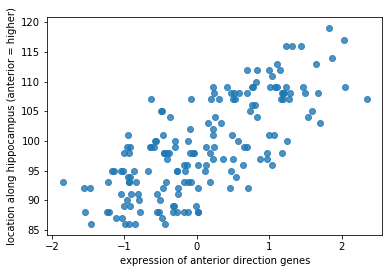

anterior 10 genes vs. y:  r2 = 0.5417433381516524, p = 2.836255822340777e-30 




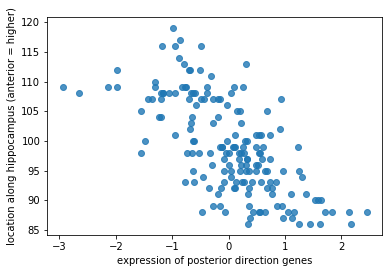

posterior 10 genes vs. y:  r2 = 0.45513306654038926, p = 6.3820616343213924e-24 




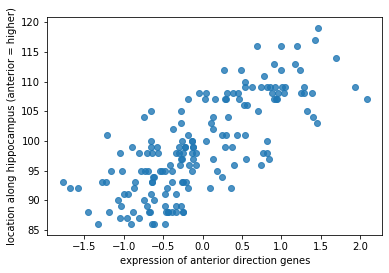

anterior 20 genes vs. y:  r2 = 0.5772779741942689, p = 3.123957404585294e-33 




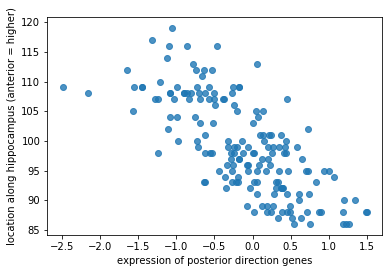

posterior 20 genes vs. y:  r2 = 0.5287595402930849, p = 3.000115271192674e-29 




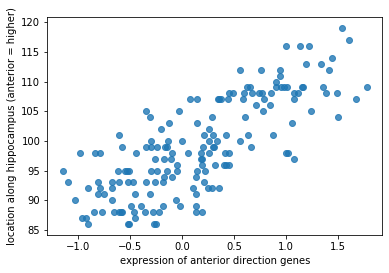

anterior 50 genes vs. y:  r2 = 0.6047815666383557, p = 1.0727786338169068e-35 




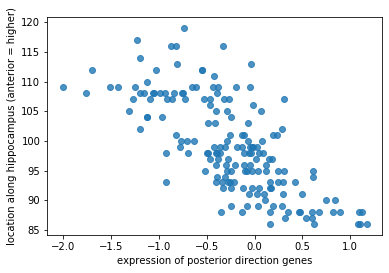

posterior 50 genes vs. y:  r2 = 0.5214958089955449, p = 1.0916985618657428e-28 




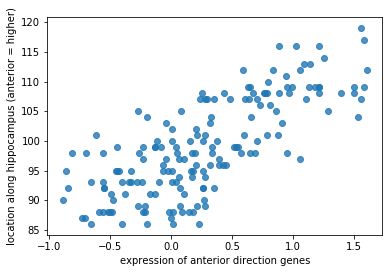

anterior 100 genes vs. y:  r2 = 0.5685353701955145, p = 1.7568686274808927e-32 




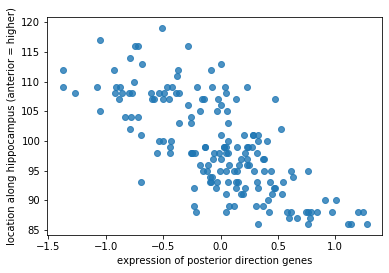

posterior 100 genes vs. y:  r2 = 0.5305694445470367, p = 2.1678529960860725e-29 




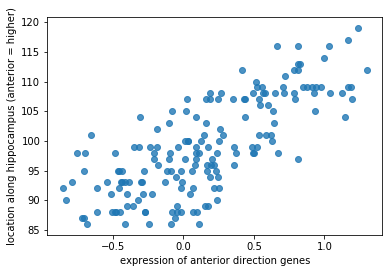

anterior 200 genes vs. y:  r2 = 0.5739899541952742, p = 6.005892221388124e-33 




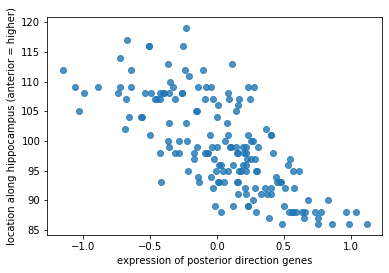

posterior 200 genes vs. y:  r2 = 0.53001274916878, p = 2.3960150940040607e-29 




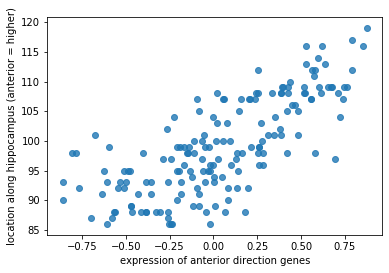

anterior 500 genes vs. y:  r2 = 0.5613153739639569, p = 7.126299913102085e-32 




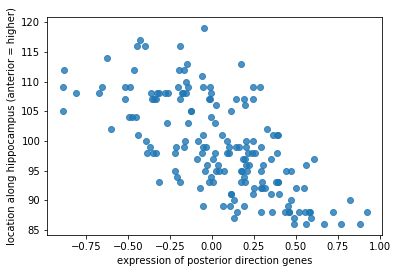

posterior 500 genes vs. y:  r2 = 0.45670104671326817, p = 5.001493967622549e-24 




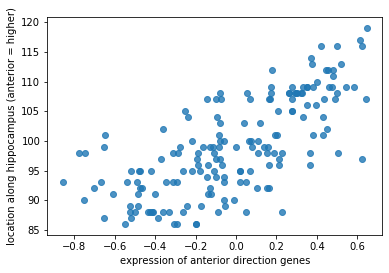

anterior 1000 genes vs. y:  r2 = 0.5062192225406296, p = 1.5519698984001636e-27 




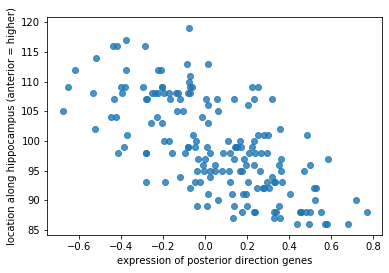

posterior 1000 genes vs. y:  r2 = 0.4544182935272966, p = 7.130482623736235e-24 




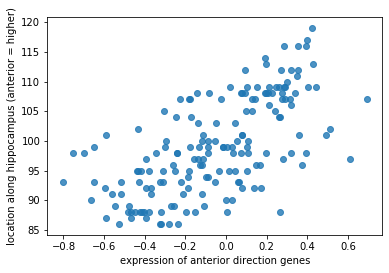

anterior 2000 genes vs. y:  r2 = 0.41358290072402754, p = 3.2074787398825166e-21 




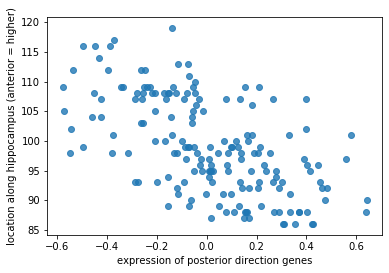

posterior 2000 genes vs. y:  r2 = 0.34865926180578416, p = 2.3587469013293003e-17 




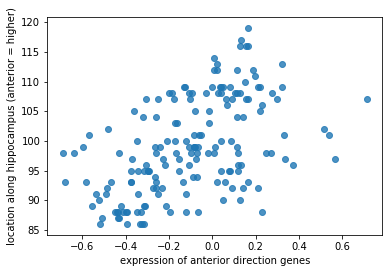

anterior 5000 genes vs. y:  r2 = 0.26025068354787334, p = 1.1941625384488283e-12 




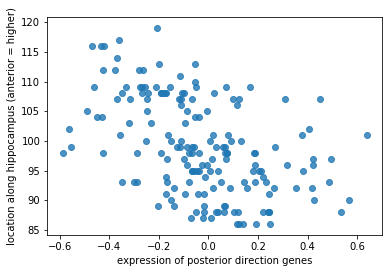

posterior 5000 genes vs. y:  r2 = 0.22703985626125323, p = 5.09894187119108e-11 




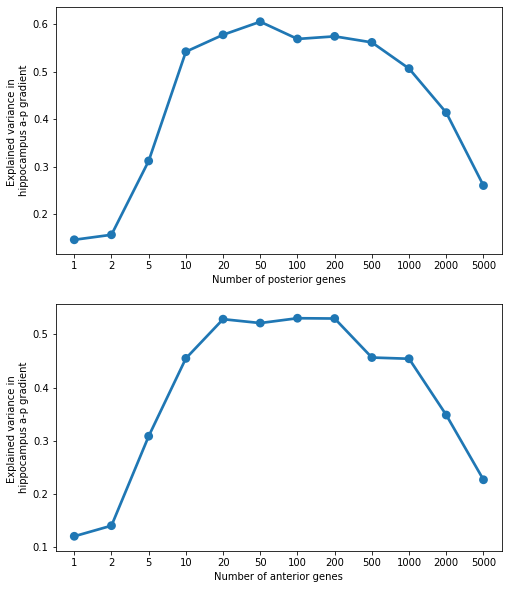

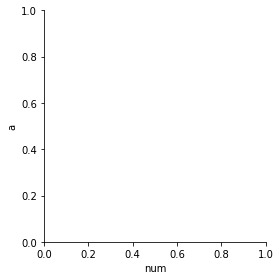

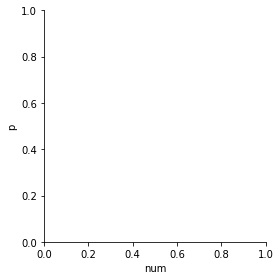

In [7]:
pcalr_out_NEW = hap.PCA_LR_pipeline(xp.values.T, # X (Gene expression)
                                    df.position_along_hipp_AP_axis, # Y (Location on axis)
                                    cv_strategy='score', # Show the 10-fold CV score
                                    illustrative=True, # Show plots
                                    test_gene_num = [1, 2, 5, 10, 20, 50, 100,  # sanity check
                                                    200, 500, 1000, 2000, 5000],
                                    sanity_check_style = 'separate') # post. and ant. separate

#### Do ten rounds of 10-fold CV and plot

In [9]:
## Run 10-fold cross-validation 10 times

# Redoing snippets of the pipeline above
clf = linear_model.LassoCV(random_state = 123) # set LASSO model
pca_tfm = pcalr_out_NEW['pca_object'].transform(xp.values.T) # perform PCA
cv=10 # 10 rounds
cv_strategy=10 # 10 folds 
y = df.position_along_hipp_AP_axis

score = [] # capture score at each round (just out of interest)
preds = np.zeros((cv_strategy,len(y))) # empty matrix to save predictions

# Run it
for i in range(cv_strategy): # for each round
    # set KFold object
    sel = model_selection.KFold(n_splits=cv, shuffle=True, random_state=(123 * (i+1)))
    # Make predictions
    predicted = model_selection.cross_val_predict(clf, pca_tfm, y=y, cv=sel)
    # store predictions and scores
    preds[i,:] = predicted
    score.append(stats.pearsonr(predicted, y)[0]**2)
    print('completed iteration',i+1)

# print scores from each round
score

completed iteration 1
completed iteration 2
completed iteration 3
completed iteration 4
completed iteration 5
completed iteration 6
completed iteration 7
completed iteration 8
completed iteration 9
completed iteration 10


[0.7030459349824308,
 0.6850340513552909,
 0.7115880420701713,
 0.6765132647778557,
 0.719051236050233,
 0.6824862602181085,
 0.7062469674810827,
 0.7187239011691949,
 0.7146187344448772,
 0.7027371299421361]

#### PLOT THE RESULTS

In [118]:
# if you want to save figures to a directory...
# fig_dir = '/home/users/jvogel/Science/Allen_Human_Brain_Atlas/figs/'

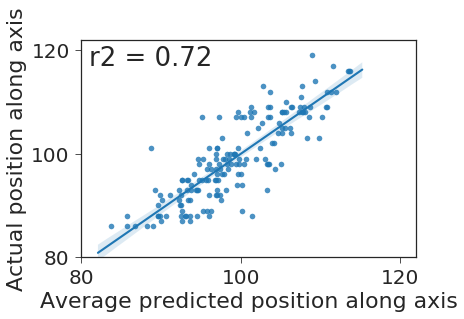

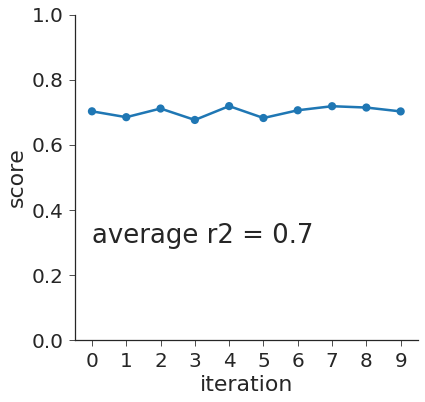

average r2: 0.7020045522491382
std r2: 0.015490045272712555


In [10]:
plt.close()
sns.set_context('paper', font_scale=2.5)
sns.set_style('ticks')
sns.regplot(preds.mean(0), y, fit_reg=True)
plt.xlim(80,122)
plt.ylim(80,122)
plt.xticks(range(80,121,20))
plt.yticks(range(80,121,20))
plt.xlabel('Average predicted position along axis')
plt.ylabel('Actual position along axis')
r2 = np.float16(stats.pearsonr(preds.mean(0), y)[0]**2)
plt.text(81, 117,'r2 = %s'%(float('%.2g' % r2)), fontsize=26)
#plt.savefig(os.path.join(fig_dir,'model_cross_val_revised.pdf'), 
 #           bbox_inches='tight')
plt.show()

jnk = pandas.DataFrame(index = range(cv_strategy), 
                       columns = ['score','iteration'])
jnk.loc[:,'iteration'] = list(range(cv_strategy))
jnk.loc[:,'score'] = score
plt.close()
sns.factorplot(x='iteration',y='score',data=jnk, size=6, aspect=1.1)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.text(0, 0.3,'average r2 = %s'%(float('%.2g' % np.mean(score))), fontsize=26)
plt.show()
print('average r2:',np.mean(score))
print('std r2:', np.std(score,ddof=1))
#plt.savefig(os.path.join(fig_dir,'vg_cross_val.pdf'), 
#            bbox_inches='tight')

### FIT THE MODEL TO THE WHOLE DATASET

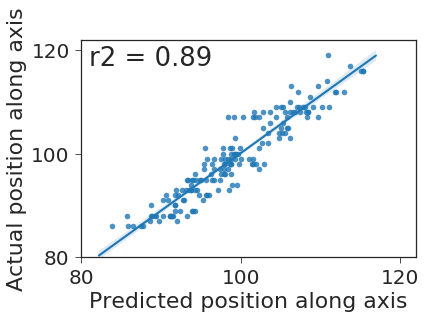

In [11]:
plt.close()
sns.regplot(pcalr_out_NEW['final_model'].predict(pca_tfm),y)
plt.xlim(80,122)
plt.ylim(80,122)
plt.xticks(range(80,121,20))
plt.yticks(range(80,121,20))
plt.xlabel('Predicted position along axis')
plt.ylabel('Actual position along axis')
r2 = np.float16(stats.pearsonr(pcalr_out_NEW['final_model'].predict(pca_tfm), y)[0]**2)
plt.text(81, 117,'r2 = %s'%(float('%.2g' % r2)), fontsize=26)
#plt.savefig(os.path.join(fig_dir,'full_model_fit.pdf'), 
#          bbox_inches='tight')
plt.show()

### LOOK AT DISTRIBUTION OF WEIGHTS

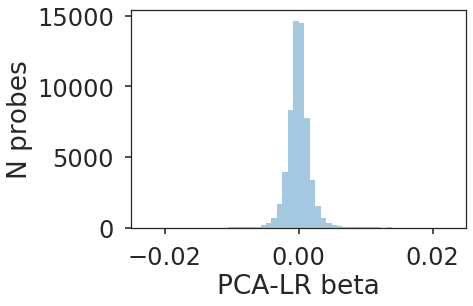

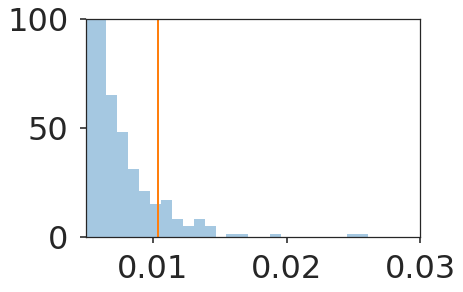

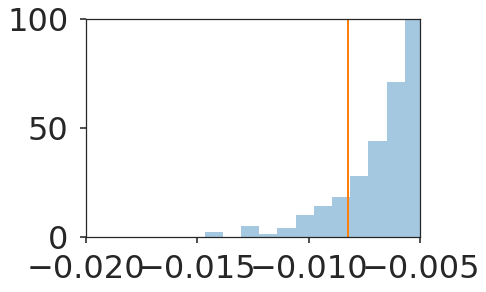

In [12]:
## WHOLE DISTRIBUTION
plt.close()
sns.set_context('poster',font_scale=1.5)
sns.distplot(pcalr_out_NEW['betas'],kde=False)
plt.xlim(-0.025,0.025)
plt.xlabel('PCA-LR beta')
plt.ylabel('N probes')
#plt.savefig(os.path.join(fig_dir,'BetaDist.pdf'),
#           bbox_inches = 'tight')
plt.show()

## ZOOM ON RIGHT SIDE
plt.close()
sns.set_context('poster',font_scale=2)
sns.distplot(pcalr_out_NEW['betas'],kde=False)
plt.xlim(0.005,0.030)
plt.ylim(0,100)
xval = sorted(pcalr_out_NEW['betas'])[-50]
plt.plot([xval, xval], [0, 100], linewidth=2)
#plt.savefig(os.path.join(fig_dir,'BetaDistL.pdf'),
#           bbox_inches='tight')
plt.show()

# ZOOM ON LEFT SIDE
plt.close()
sns.set_context('poster',font_scale=2)
sns.distplot(pcalr_out_NEW['betas'],kde=False)
plt.xlim(-0.02,-0.005)
plt.xticks([-0.02, -0.015, -0.01, -0.005])
plt.ylim(0,100)
xval = sorted(pcalr_out_NEW['betas'])[50]
plt.plot([xval, xval], [0, 100], linewidth=2)
#plt.savefig(os.path.join(fig_dir,'BetaDistR.pdf'),
#           bbox_inches='tight')
plt.show()

#### LOOK AT MODEL ACROSS SUBFIELDS (FIT TO ALL DATA)

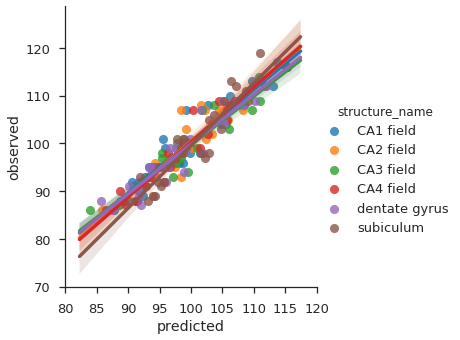

In [13]:
# we only care about structure, not hemisphere...
df.loc[:,'bilateral_structure_name'] = [x.split(',')[0] for x in df.structure_name.values]

sns.set_context('talk')
sns.set_style('ticks')
pca_tfm = pcalr_out_NEW['pca_object'].transform(xp.values.T) # transform with PCA
predicted = pcalr_out_NEW['final_model'].predict(pca_tfm) # get predicted values

# put in df with structure name
jnk = pandas.concat([pandas.Series(predicted),
                     df.position_along_hipp_AP_axis,
                    df.bilateral_structure_name], axis=1) 
jnk.columns = ['predicted','observed','structure_name']

# plot
plt.close()
sns.lmplot(x='predicted', y='observed', hue='structure_name', data=jnk)
plt.xticks(range(80,125,5))
plt.show()

#### LOOK AT MODEL ACROSS SUBFIELDS (FIT TO ALL DATA)

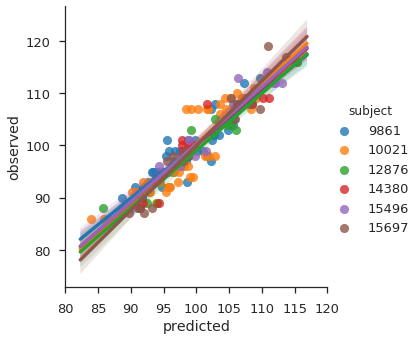

In [14]:
pca_tfm = pcalr_out_NEW['pca_object'].transform(xp.values.T)
predicted = pcalr_out_NEW['final_model'].predict(pca_tfm)

jnk = pandas.concat([pandas.Series(predicted),
                     df.position_along_hipp_AP_axis,
                     df['donor']], 
                    axis=1)
jnk.columns = ['predicted','observed','subject']

plt.close()
sns.lmplot(x='predicted', y='observed', hue='subject', data=jnk)
plt.xticks(range(80,125,5))
plt.show()

## Leave-one-subfield-out analysis
We train the model on five subfields and try to predict sample location of the sixth subfield.
We repeat for each subfield

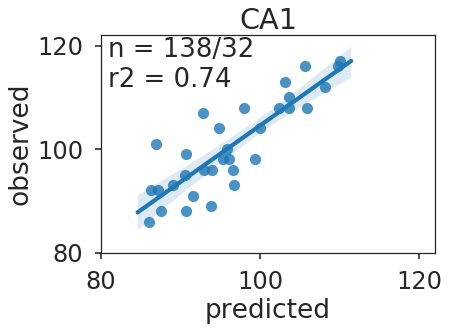

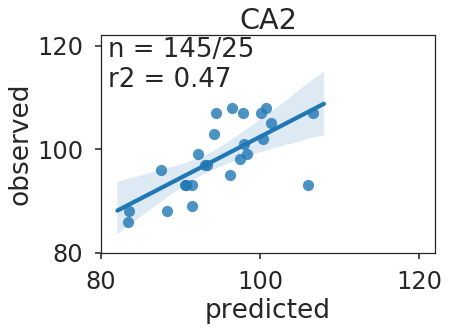

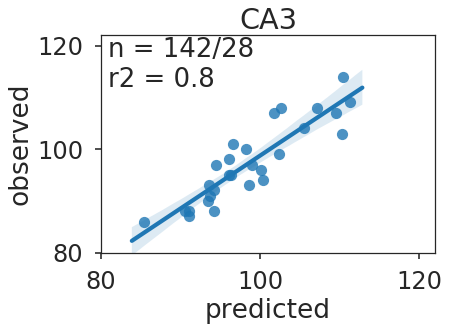

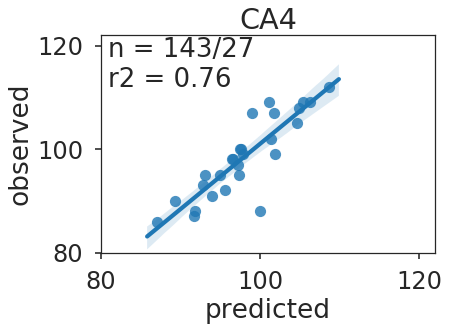

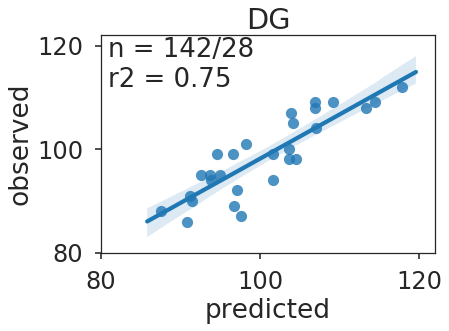

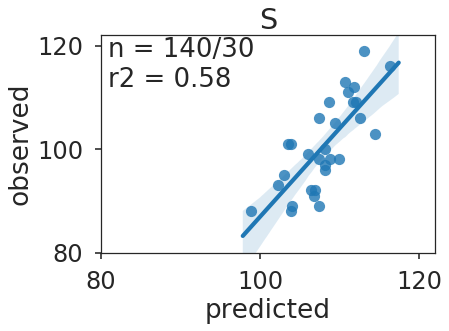

In [15]:
# set model
clf = linear_model.LassoCV(random_state = 123)

for i,subfield in enumerate(df.structure_acronym.unique()): # for each subfield
    # identify which hippocampal samples to train on (not the subfield)
    Tr_samps = df[df.structure_acronym!=subfield].index
    # identify which hippocampal samples to test on (the subfield)
    Te_samps = df[df.structure_acronym==subfield].index
    # size of train and test
    nX = len(Te_samps)
    nT = len(Tr_samps)
    # set X and Y 
    X = pca_tfm[Tr_samps,:]
    y = df.loc[Tr_samps,'position_along_hipp_AP_axis']
    # run model on training sample
    mod = clf.fit(X,y)
    # predict axis location for the left out subfield
    pred = mod.predict(pca_tfm[Te_samps,:])
    
    # Plot it
    plt.close()
    sns.set_context('poster', font_scale=1.5)
    sns.set_style('ticks')
    sns.regplot(pred, df.loc[Te_samps,'position_along_hipp_AP_axis'].values)
    plt.title(subfield)
    plt.xlim(80,122)
    plt.ylim(80,122)
    plt.xticks(range(80,121,20))
    plt.yticks(range(80,121,20))
    plt.xlabel('predicted')
    plt.ylabel('observed')
    # overlay r2
    r2 = np.float16(stats.pearsonr(pred, df.loc[Te_samps,'position_along_hipp_AP_axis'].values
                                  )[0]**2)
    # overlay sample sizes
    plt.text(81, 112,'n = %s/%s\nr2 = %s'%(nT,nX,float('%.2g' % r2)), fontsize=26)
    #plt.savefig(os.path.join(fig_dir,LOSO_%s.pdf'%subfield), 
    #            bbox_inches='tight')
    plt.show()

## Leave-one-donor-out analysis
We train the model on five donors and try to predict sample location of the sixth donor.
We repeat for each donor

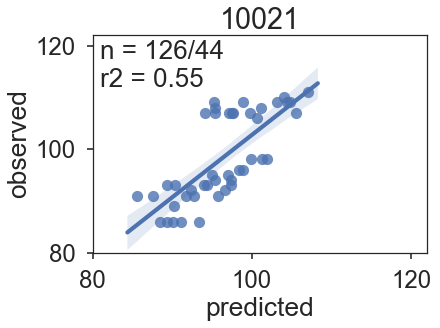

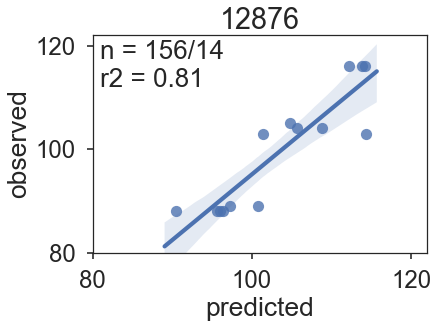

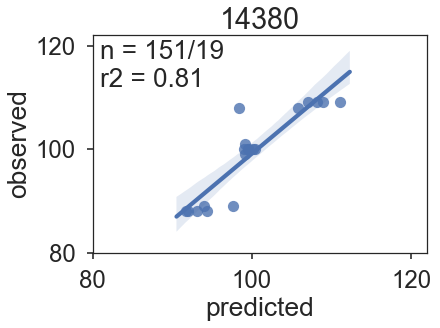

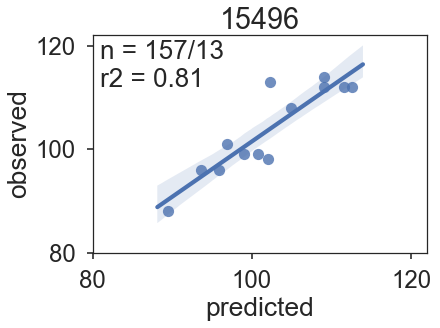

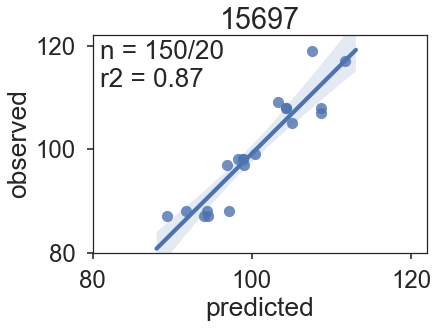

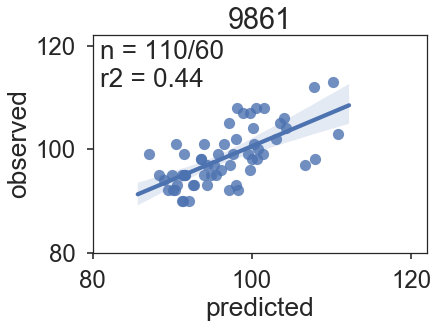

In [334]:
# initialize model
clf = linear_model.LassoCV(random_state = 123)

for i,subject in enumerate(df['donor'].unique()): # for each donor
    # ID samples from training sample (not the donor)
    Tr_samps =  df[df['donor']!=subject].index
    # ID samples from the test sample (the donor)
    Te_samps = df[df['donor']==subject].index
    # Set X and y
    X = pca_tfm[Tr_samps,:]
    y = df.loc[Tr_samps,'position_along_hipp_AP_axis']
    # get size of training and test
    nX = len(Te_samps)
    nT = len(Tr_samps)
    # run model
    mod = clf.fit(X,y)
    # predict axis location for samples from the left-out donor
    pred = mod.predict(pca_tfm[Te_samps,:])
    
    # plot it
    plt.close()
    sns.set_context('poster', font_scale=1.5)
    sns.set_style('ticks')
    sns.regplot(pred, df.loc[Te_samps,'position_along_hipp_AP_axis'].values)
    plt.title(subject)
    plt.xlim(80,122)
    plt.ylim(80,122)
    plt.xticks(range(80,121,20))
    plt.yticks(range(80,121,20))
    plt.xlabel('predicted')
    plt.ylabel('observed')
    # overlay r2
    r2 = np.float16(stats.pearsonr(pred, df.loc[Te_samps,'position_along_hipp_AP_axis'].values
                                  )[0]**2)
    # overlay sample sizes for train and test sets
    plt.text(81, 112,'n = %s/%s\nr2 = %s'%(nT,nX,float('%.2g' % r2)), fontsize=26)
    #plt.savefig(os.path.join(fig_dir,'LOSubO_%s.pdf'%subject), 
    #            bbox_inches='tight')
    plt.show()

#### Leave-one-hemisphere-out
A co-author asked for this. I don't think it makes that much sense to do, but I keep it here in case a reviewer asks for it... 

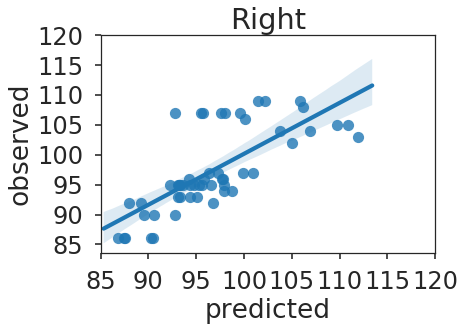

0.5396


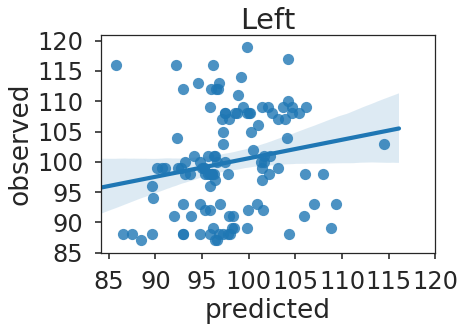

0.0329


In [16]:
hemi = ['Left' if x < 0 else 'Right' for x in df.mni_nlin_x]
df.loc[:,'hemisphere'] = hemi
for hemisphere in df['hemisphere'].unique():
    Tr_samps =  df[df['hemisphere']!=hemisphere].index
    Te_samps = df[df['hemisphere']==hemisphere].index
    X = pca_tfm[Tr_samps,:]
    y = df.loc[Tr_samps,'position_along_hipp_AP_axis']
    mod = clf.fit(X,y)
    pred = mod.predict(pca_tfm[Te_samps,:])
    
    plt.close()
    sns.regplot(pred, df.loc[Te_samps,'position_along_hipp_AP_axis'].values)
    plt.title(hemisphere)
    plt.xticks(range(85,125,5))
    plt.yticks(range(85,125,5))
    plt.xlabel('predicted')
    plt.ylabel('observed')
    plt.show()
    print(np.float16(stats.pearsonr(pred, df.loc[Te_samps,'position_along_hipp_AP_axis'].values)[0]**2))

### TAKING A QUICK LOOK AT THE MOST IMPORTANT ANTERIOR AND POSTERIOR PROBES (ACCORDING TO THE LASSO-PCR MODEL)

In [27]:
probes.loc[pcalr_out_NEW['gene_selections']['anterior_genes_50']]['gene_symbol'].tolist()

['SERPINF1',
 'SERPINF1',
 'KLK7',
 'RSPH9',
 'KLK7',
 'LYPD1',
 'GABRQ',
 'PYDC1',
 'SYTL2',
 'RP13-102H20.1',
 'SYTL2',
 'SSTR1',
 'LXN',
 'TMEM215',
 'SYTL2',
 'C1QL1',
 'PIRT',
 'KCNG1',
 'AQP3',
 'A_23_P213527',
 'RP11-45B20.3',
 'C1orf187',
 'GPR39',
 'OPRK1',
 'CD36',
 'AQP3',
 'KLK7',
 'MYB',
 'GPR26',
 'LMO1',
 'GPR88',
 'VGLL3',
 'NR2F2',
 'NR2F2',
 'NR2F2',
 'GPR83',
 'GDA',
 'NRG1',
 'RSPO2',
 'A_32_P136776',
 'C20orf103',
 'SYTL1',
 'LGALS2',
 'LXN',
 'GPR26',
 'KIAA1772',
 'A_32_P115840',
 'GDA',
 'SEMA3D',
 'NRG1']

In [28]:
probes.loc[pcalr_out_NEW['gene_selections']['posterior_genes_50']]['gene_symbol'].tolist()[::-1]

['NPNT',
 'NPNT',
 'TTR',
 'A_32_P11262',
 'BDKRB1',
 'SERTAD4',
 'NTN1',
 'HHIP',
 'HHIP',
 'RP11-561O23.6',
 'GRHL2',
 'RGMA',
 'BDKRB1',
 'BNC2',
 'TPBG',
 'OSBPL3',
 'NTN1',
 'ONECUT2',
 'COL5A2',
 'RP11-291L15.2',
 'FSTL4',
 'C1orf133',
 'DGKI',
 'DDC',
 'A_24_P401842',
 'A_32_P121537',
 'TNNT2',
 'FSTL4',
 'TTR',
 'HPSE2',
 'DDC',
 'DDC',
 'COL5A2',
 'WNT10A',
 'CASR',
 'DDC',
 'PVALB',
 'A_24_P62668',
 'FAM43B',
 'CTXN3',
 'DDC',
 'HPSE2',
 'GAL',
 'GREM2',
 'KDELR3',
 'COL5A2',
 'PDLIM5',
 'ONECUT2',
 'A_24_P102119',
 'GAL']

### Make tables for the top genes

In [17]:
# MAKE TABLE FOR OVERLEAF
p50 = probes.loc[pcalr_out_NEW['gene_selections']['posterior_genes_50']][['probe_id',
                                                                    'gene_symbol',
                                                                   'gene_name']]
p50.loc[:,'beta'] = sorted(pcalr_out_NEW['betas'])[:50][::-1]
a50 = probes.loc[pcalr_out_NEW['gene_selections']['anterior_genes_50']][['probe_id',
                                                                    'gene_symbol',
                                                                   'gene_name']]
a50.loc[:,'beta'] = sorted(pcalr_out_NEW['betas'])[-50:][::-1]
gene_table = pandas.concat([a50,p50])
#gene_table

In [19]:
gene_table.head(10)

,probe_id,gene_symbol,gene_name,beta
4418,1053204,SERPINF1,"serpin peptidase inhibitor, clade F (alpha-2 a...",0.026119
4417,1053205,SERPINF1,"serpin peptidase inhibitor, clade F (alpha-2 a...",0.025298
25772,1030761,KLK7,kallikrein-related peptidase 7,0.019348
23274,1033144,RSPH9,radial spoke head 9 homolog (Chlamydomonas),0.016976
25771,1030762,KLK7,kallikrein-related peptidase 7,0.016178
20529,1036045,LYPD1,LY6/PLAUR domain containing 1,0.014526
15471,1041466,GABRQ,"gamma-aminobutyric acid (GABA) A receptor, theta",0.014374
24685,1032692,PYDC1,PYD (pyrin domain) containing 1,0.014255
14245,1042620,SYTL2,synaptotagmin-like 2,0.013917
22478,1034086,RP13-102H20.1,Rho GTPase activating protein 36,0.013885


In [20]:
gene_table.sort_values('beta').head()

,probe_id,gene_symbol,gene_name,beta
32889,1023030,NPNT,nephronectin,-0.014675
32888,1023031,NPNT,nephronectin,-0.014107
6582,1050553,TTR,transthyretin,-0.012919
51664,1064147,A_32_P11262,AGILENT probe A_32_P11262 (non-RefSeq),-0.012902
44200,1058844,BDKRB1,bradykinin receptor B1,-0.012402


In [21]:
a50 = a50.sort_values('beta',ascending=False)
p50 = p50.sort_values('beta',ascending=True)
cols = ['probe_id','gene_symbol','beta']
for i,row in a50.sort_values('beta', ascending=False)[cols].iterrows():
    line = '\\makecell{%s} '%row[0]
    for item in row[1:]:
        line += '& \makecell{%s} '%item
    line += "\\\\"
    print(line)

\makecell{1053204} & \makecell{SERPINF1} & \makecell{0.02611885295469077} \\
\makecell{1053205} & \makecell{SERPINF1} & \makecell{0.025298202952924502} \\
\makecell{1030761} & \makecell{KLK7} & \makecell{0.019348082222905794} \\
\makecell{1033144} & \makecell{RSPH9} & \makecell{0.016975918576981004} \\
\makecell{1030762} & \makecell{KLK7} & \makecell{0.016178126726723436} \\
\makecell{1036045} & \makecell{LYPD1} & \makecell{0.01452624067016874} \\
\makecell{1041466} & \makecell{GABRQ} & \makecell{0.014374464105786591} \\
\makecell{1032692} & \makecell{PYDC1} & \makecell{0.014254893343708941} \\
\makecell{1042620} & \makecell{SYTL2} & \makecell{0.013917051360702377} \\
\makecell{1034086} & \makecell{RP13-102H20.1} & \makecell{0.013885223640234833} \\
\makecell{1042619} & \makecell{SYTL2} & \makecell{0.013667337256322338} \\
\makecell{1051105} & \makecell{SSTR1} & \makecell{0.013476517763340813} \\
\makecell{1041090} & \makecell{LXN} & \makecell{0.013430183075364064} \\
\makecell{1031172

### Averaging the top 50 anterior and posterior genes... (sanity check)
The model produced a weight for each probe. To ensure these weights are actually proportional to importance, we identfigy the fifty probes with the highest and lowest weights, then average their raw signal, and ensure that the signal of these "important" probes is still associated with our phenotype.

Top 50 anterior probes

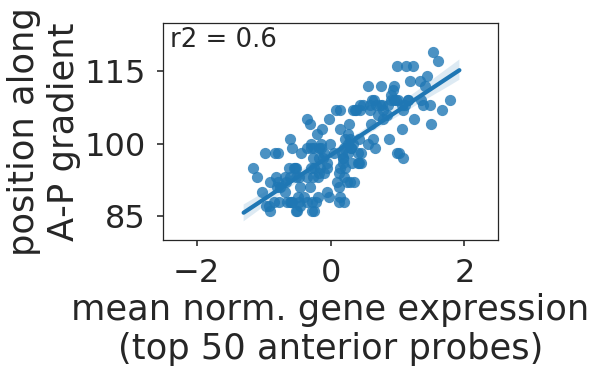

In [22]:
plt.close()
sns.set_context('poster',font_scale=2)
r2 = stats.pearsonr(xp.loc[pcalr_out_NEW['gene_selections']['anterior_genes_50']].mean(),
                    df.position_along_hipp_AP_axis)[0]**2
sns.regplot(xp.loc[pcalr_out_NEW['gene_selections']['anterior_genes_50']].mean(),
            df.position_along_hipp_AP_axis)
plt.xlabel('mean norm. gene expression\n(top 50 anterior probes)')
plt.ylabel('position along\nA-P gradient')
plt.xlim(-2.5,2.5)
plt.xticks([-2,0,2])
plt.ylim(80,125)
plt.yticks([85,100,115])
plt.text(-2.4, 120,'r2 = %s'%float('%.2g'%r2), fontsize=26)
#plt.savefig(os.path.join(fig_dir,'ant50_position.pdf'),
#           bbox_inches='tight')
plt.show()

Top 50 posterior probes

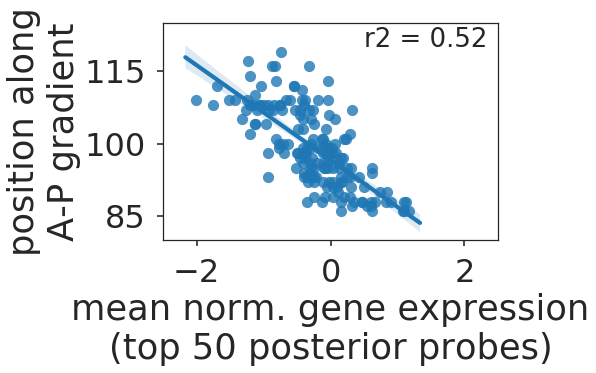

In [23]:
plt.close()
r2 = stats.pearsonr(xp.loc[pcalr_out_NEW['gene_selections']['posterior_genes_50']].mean(),
                    df.position_along_hipp_AP_axis)[0]**2
sns.regplot(xp.loc[pcalr_out_NEW['gene_selections']['posterior_genes_50']].mean(),
            df.position_along_hipp_AP_axis)
plt.xlabel('mean norm. gene expression\n(top 50 posterior probes)')
plt.ylabel('position along\nA-P gradient')
plt.xlim(-2.5,2.5)
plt.xticks([-2,0,2])
plt.ylim(80,125)
plt.yticks([85,100,115])
plt.text(0.5, 120,'r2 = %s'%float('%.2g'%r2), fontsize=26)
#plt.savefig(os.path.join(fig_dir,'post50_position.pdf'),
#           bbox_inches='tight')
plt.show()

# Absolute vs. Relative expression
See whether binarized gene expression information can explain the effects. This didn't make it into the manuscript.

In [41]:
# GET ALL BINARIZED GENE EXPRESSION DATA AT ONCE (This can take some time and requires a lot of memory)

shtz = sorted(glob(os.path.join(aba_dir,'normalized_microarray_donor*/PACall.csv')))
holder = []
for sht in shtz:
    jnk = pandas.read_csv(sht,header=None)
    jnk.drop(jnk.columns[0],axis=1,inplace=True)
    holder.append(jnk)
bigdf_b = pandas.concat(holder,axis=1)
del(holder)

In [42]:
## PULL OUT HIPPOCAMPUS SAMPLES
hipp_samps = []
for col in xp.columns:
    jnk = col.split('_')
    sub = jnk[0]
    samp = jnk[-1]
    idx = gdf[(gdf.donor==int(sub)) & (gdf['sample']==int(samp))].index
    hipp_samps.append(idx[0])

In [43]:
bin_hipp = bigdf_b.iloc[:,hipp_samps]
bin_hipp.shape

(58692, 170)

In [50]:
del(bigdf_b)

In [44]:
bin_hipp_a = bin_hipp.loc[pcalr_out_NEW['gene_selections']['anterior_genes_50']]
bin_hipp_p = bin_hipp.loc[pcalr_out_NEW['gene_selections']['posterior_genes_50']]

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


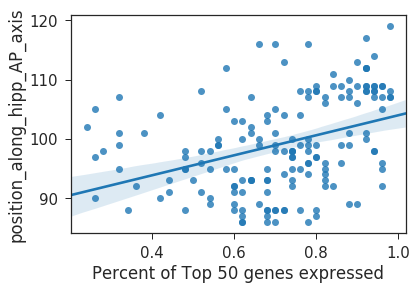

In [48]:
sns.set_context('notebook', font_scale=1.5)
plt.close()
sns.regplot(bin_hipp_a.mean(),df.position_along_hipp_AP_axis)
plt.xlabel('Percent of Top 50 genes expressed')
plt.show()

/home/users/jvogel/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


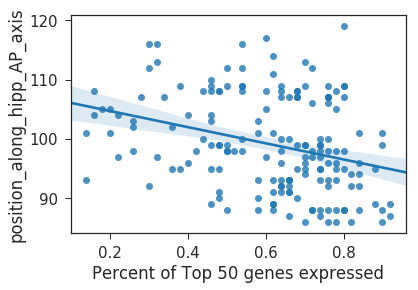

In [49]:
plt.close()
sns.regplot(bin_hipp_p.mean(),df.position_along_hipp_AP_axis)
plt.xlabel('Percent of Top 50 genes expressed')
plt.show()


# RENDER THE RESULTS ONTO THE HIPPOCAMPUS SURFACE

Get the hippocampus from the harvard-oxford atlas and view it

In [24]:
# load atlas
jnk = ni.load(os.path.join(wdir,'HarvardOxford-sub-maxprob-thr25-1mm.nii.gz'))
atlas = jnk.get_data()
aff = jnk.affine

In [25]:
# Isolate hippocampus
hipp = np.zeros_like(atlas)
hipp[(atlas==9) | (atlas==19)] = 1
nhipp = ni.Nifti1Image(hipp, aff)

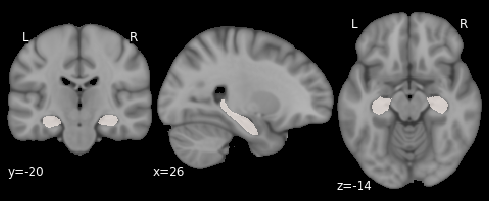

In [26]:
# Load MNI template
mni = ni.load(os.path.join(wdir,'MNI152_T1_1mm_brain.nii.gz'))

# plot hippocampus
plt.close()
plotting.plot_roi(nhipp, mni, draw_cross=False, cmap='Reds')
plt.show()

Identify closest tissue sample to each hippocampal voxel

In [27]:
hipp = nhipp.get_data()
hcoods = np.where(hipp==1)

In [28]:
# convert sample MNI coordinates to XYZ coordinates
s_coords = [hap.convert_coords([round(df.mni_nlin_x[x]),
                 round(df.mni_nlin_y[x]), 
                round(df.mni_nlin_z[x])],'xyz') for x in range(df.shape[0])]

In [29]:
# Make empty dataframe
vox = pandas.DataFrame(index=range(len(hcoods[0])),
                       columns=['x','y','z','ind'])

# for each coordinate in the hippocampus
for c in range(len(hcoods[0])):
    # get coordinate
    cord = [hcoods[0][c], hcoods[1][c], hcoods[2][c]]
    # find distance of each tissue sample to coordinate
    dists = [abs(cord[0] - s_coords[x][0]) + \
             abs(cord[1] - s_coords[x][1]) + \
             abs(cord[2] - s_coords[x][2]) for x in range(len(s_coords))]
    vox.loc[c, ['x','y','z']] = cord
    # store tissue sample with shortest distance to voxel
    vox.loc[c,'ind'] = np.argmin(dists)
    if c%1000 == 0:
        print('finished',c)

finished 0
finished 1000
finished 2000
finished 3000
finished 4000
finished 5000
finished 6000
finished 7000
finished 8000
finished 9000
finished 10000
finished 11000


In [85]:
# Save this because we'll use it to speed things up in NB4
vox.to_csv(os.path.join(wdir,'MAIN_vox_mapping.csv'),index=False)

In [5]:
#vox = pandas.read_csv(os.path.join(wdir,'MAIN_vox_mapping.csv')).astype(int)

Plot

In [30]:
# Initiate X and y
mod = pcalr_out_NEW['final_model']
X = pcalr_out_NEW['pca_object'].transform(xp.T)
figy = mod.predict(X)


In [31]:
# For each hippocampus voxel,
# fill in predicted value of closest tissue sample
rend_hipp_T = np.zeros_like(hipp)
for i,row in vox.iterrows():
    rend_hipp_T[row['x'],row['y'],row['z']] = figy[row['ind']]

In [35]:
from importlib import reload
reload(hap)

<module 'HAP_Utils' from '/home/users/jvogel/git/Hippocampus_AP_Axis/HAP_Utils.py'>

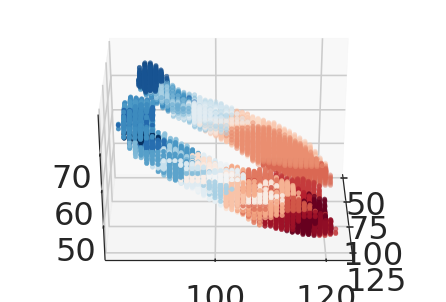

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [37]:
# plotit
hap.plot_3d_render(np.where(hipp == 1), rend_hipp_T, r1=0,r2=180,step=30)

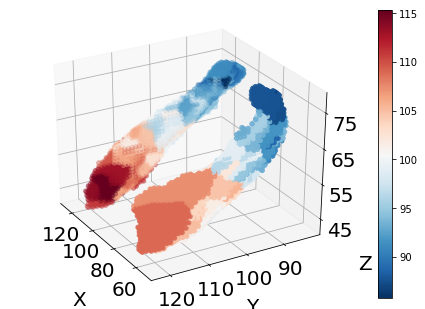

In [25]:
hap.plot_3d_render(np.where(hipp == 1), rend_hipp_T, r1=0, r2=180, step=30)

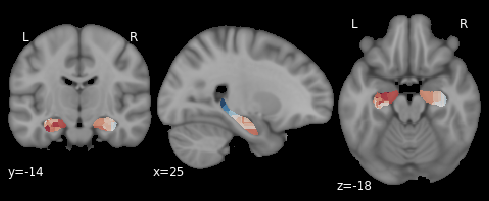

In [38]:
#mni = ni.load('/Users/jakevogel/Science/tau/MNI152_T1_1mm_brain.nii')
plt.close()
plotting.plot_roi(ni.Nifti1Image(rend_hipp_T, aff), mni, draw_cross=False, cmap='RdBu_r')
plt.show()

We repeat this process, but this time, we first move all tissue samples to the surface by first identifying the closest hippocampus surface voxel to each hippocampus voxel

In [5]:
# First, ID whether a voxel is a surface voxel 
# by seeing if it borders a zero
for c in range(len(hcoods[0])):
    cord = [hcoods[0][c], hcoods[1][c], hcoods[2][c]]
    if any(hipp[hap.make_cube(cord,2)]==0):
        vox.loc[c,'surface'] = 1
    else:
        vox.loc[c,'surface'] = 0
    if c%1000 == 0:
        print('finished',c)

In [27]:
surf_vox = pandas.DataFrame(vox[vox.surface==1],copy=True)

In [30]:
# Next, for each tissue sample, 
# find the index of the closest surface voxel

sample_surf_ind = []
arr = surf_vox[['x','y','z']].values
for i,row in df.iterrows():
    cord = hap.convert_coords([row['mni_nlin_x'],row['mni_nlin_y'],row['mni_nlin_z']],'xyz')
    dists = [abs(cord[0] - arr[x,0]) + \
             abs(cord[1] -  arr[x,1]) + \
             abs(cord[2] -  arr[x,2]) for x in range(surf_vox.shape[0])]
    sample_surf_ind.append(np.argmin(dists))
    if i%10 == 0:
        print('finished',i)

finished 0
finished 10
finished 20
finished 30
finished 40
finished 50
finished 60
finished 70
finished 80
finished 90
finished 100
finished 110
finished 120
finished 130
finished 140
finished 150
finished 160


In [31]:
df.loc[:,'surface_coordinate_index'] = sample_surf_ind

In [32]:
surf_vox = surf_vox.astype(int)

In [35]:
# Finally, for each voxel, find the closest surface voxel
s_coords = np.where(hipp == 1)
for i,row in surf_vox.iterrows():
    cord = [row['x'],row['y'],row['z']]
    dists = [abs(cord[0] - s_coords[0][x]) + \
             abs(cord[1] - s_coords[1][x]) + \
             abs(cord[2] - s_coords[2][x]) for x in range(len(s_coords[0]))]
    surf_vox.loc[i,'closest_surface_ind'] = np.argmin(dists)
    if i%1000 == 0:
        print('finished',i)

finished 0
finished 2000
finished 3000
finished 4000
finished 6000
finished 7000
finished 8000
finished 9000
finished 11000


In [37]:
# For each hippocampus voxel, fill in the closest surface voxel 
# with the predicted value of closest tissue sample
surf_vox = surf_vox.astype(int)
rend_hipp_t3 = np.zeros_like(hipp)
for i,row in surf_vox.iterrows():
    rend_hipp_t3[row['x'],row['y'],row['z']] = figy[row['ind']]

/home/users/jvogel/git/Hippocampus_AP_Axis/HAP_Utils.py:141: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f = ax.scatter(label_locations[0], label_locations[1], label_locations[2], c = data[label_locations],


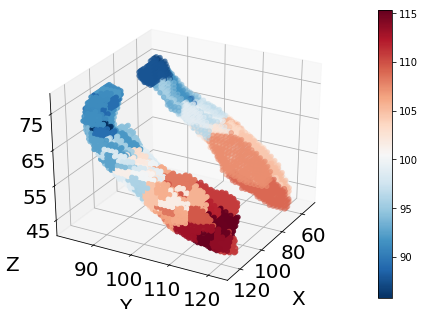

In [42]:
# Plot (here we get a bit more definition)
label_locations = [surf_vox['x'].tolist(),
                   surf_vox['y'].tolist(),
                   surf_vox['z'].tolist()] 
hap.plot_3d_render(label_locations, rend_hipp_t3)

/home/users/jvogel/git/Hippocampus_AP_Axis/HAP_Utils.py:141: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  f = ax.scatter(label_locations[0], label_locations[1], label_locations[2], c = data[label_locations],


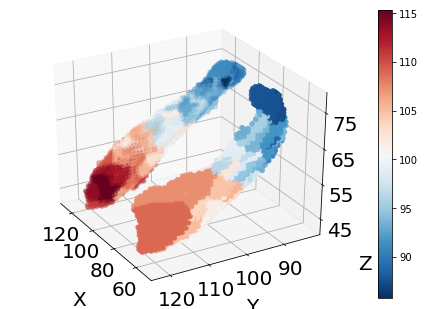

In [43]:
hap.plot_3d_render(label_locations, rend_hipp_t3, r1=0, r2=180, step=30)

# FITTING A PCR MODEL FOR COMPARISON
To ensure our results aren't totally unique to our model choice, we employ a similar model (Partial Least Squares)

For this section, you will have to download/clone the data_driven_pathology repository from my github:

https://github.com/illdopejake/data_driven_pathology

In [39]:
# Load the module and some home-made PLS utilities
from sklearn.cross_decomposition import PLSRegression
sys.path.insert(0,'/home/users/jvogel/git/data_driven_pathology/')
import CrossDecomp as pls

Use 10-fold CV to find the optimal number of components ("modes)

In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error

# create an empty dataframe
ncs = 20
nc_chooser = pandas.DataFrame(index = range(ncs), 
                              columns = ['nc','r2','mae'])
i=0

# From number of components 1-20,
for k,nc in enumerate(range(1,ncs+1)):
    print(nc)
    # Run a PLS model on the data with 10-fold CV
    pred = cross_val_predict(PLSRegression(n_components=k+1), xp.T, 
                             df.position_along_hipp_AP_axis, 
                            groups = df.structure_acronym, cv=10)
    # Store the r2 
    nc_chooser.loc[i, 'r2'] = r2_score(y_true=df.position_along_hipp_AP_axis, y_pred=pred)
    nc_chooser.loc[i, 'mae'] = mean_absolute_error(y_true=df.position_along_hipp_AP_axis, y_pred=pred)
    #nc_chooser.loc[i, 'estimator'] = lab
    i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


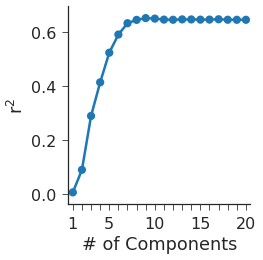

In [42]:
# Plot learning curve
sns.set_context('paper', font_scale=2)
nc_chooser.loc[:,'nc'] = range(1,21)
plt.close()
g = sns.factorplot(x='nc', y='r2', data=nc_chooser, aspect=1)
g.set_xticklabels(['' if x not in [1,5,10,15,20] else x for x in range(1,21)])
plt.xlabel('# of Components')
plt.ylabel('r$^2$')
#plt.savefig('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/figs/PLS_CV.pdf', 
#            bbox_inches='tight')
plt.show()


9 components seems best. Throw it into the model pipeline

performing model cross-validation
using basic 10-fold cross-validation


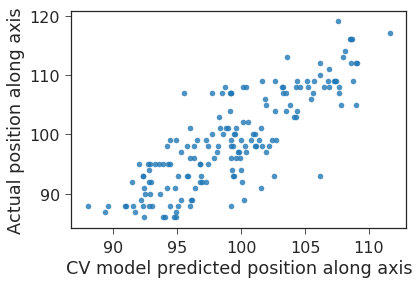

model cv score: r2 =  0.6853941520802065
running final model
final model fit r2 =  0.9848372912935887


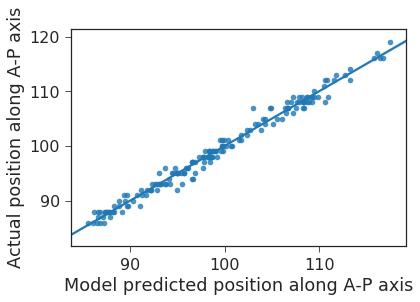

running sanity_check


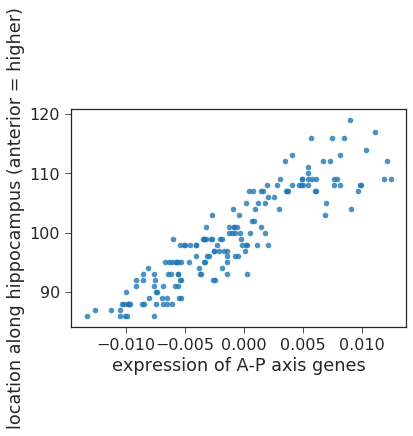

posterior and anterior 100 genes vs. y:  r2 = 0.837916377719392, p = 2.7837694653636068e-68 




In [43]:
# testing weighted averages
pls_out = hap.PCA_LR_pipeline(xp.values.T,
                            (df.position_along_hipp_AP_axis), 
                          clf = PLSRegression(n_components=9),
                          pca=None,
                            cv_strategy='score', illustrative=True,
                           test_gene_num = [100],
                               sanity_check_style = 'model')

Compare betas between LASSO-PCR and PCLR

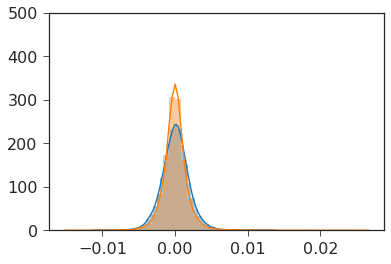

In [44]:
plt.close()
sns.distplot(pls_out['betas'])
sns.distplot(pcalr_out_NEW['betas'])
plt.ylim(0,500)
plt.show()

In [45]:

jnk = pandas.DataFrame(index = range(len(pls_out['betas'])), columns = ['pls','lpcr'])
jnk.loc[:,'pls'] = pls_out['betas']
jnk.loc[:,'lpcr'] =  pcalr_out_NEW['betas']
jnk.loc[:,'gene'] = probes.loc[:,'gene_symbol'].values

In [46]:
jnk.sort_values('pls',ascending=False).head(20)

,pls,lpcr,gene
23274,0.013265,0.016976,RSPH9
40112,0.012444,0.011282,NR2F2
2781,0.012281,0.013176,KCNG1
35503,0.012104,0.011182,NR2F2
14245,0.011851,0.013917,SYTL2
40987,0.011792,0.011192,NR2F2
35268,0.011710,0.006943,CADM1
14246,0.011565,0.013667,SYTL2
41473,0.010982,0.006512,CADM1
14244,0.010901,0.013277,SYTL2


In [48]:
pls_mod = PLSRegression(n_components=9).fit(xp.T, df.position_along_hipp_AP_axis)

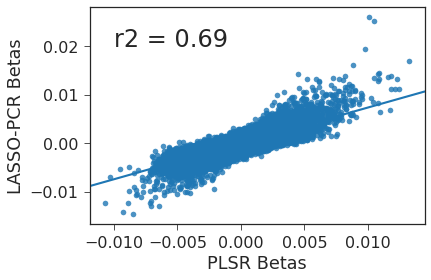

In [49]:
plt.close()
sns.regplot(pls_mod.coef_[:,0], pcalr_out_NEW['betas'])
plt.ylabel('LASSO-PCR Betas')
plt.xlabel('PLSR Betas')
r2 = stats.pearsonr(pls_mod.coef_[:,0], pcalr_out_NEW['betas'])[0]**2
plt.text(-0.01, 0.02,'r2 = %s'%(float('%.2g' % r2)), fontsize=24)
#plt.savefig(os.path.join(fig_dir,'PLS_comp.pdf'), bbox_inches='tight')
plt.show()

Compare the normality of the residuals of the two models

In [50]:
fit_mod = pcalr_out_NEW['final_model']
pred = fit_mod.predict(pcalr_out_NEW['pca_object'].transform(xp.values.T))
resid = pred - df.position_along_hipp_AP_axis.values

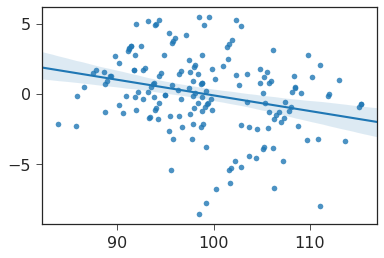

In [51]:
# Lasso-PCR
plt.close()
sns.regplot(pred, resid)
plt.show()

In [52]:
fit_mod = pls_out['final_model']
pred = fit_mod.predict(xp.values.T)[:,0]
resid = pred - df.position_along_hipp_AP_axis.values

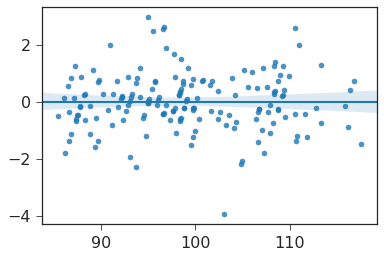

In [53]:
# PLSR
plt.close()
sns.regplot(pred, resid)
plt.show()

Do 10 runs of 10-fold CV

In [54]:
clf = PLSRegression(n_components=9)
cv=10
cv_strategy=10
y = df.position_along_hipp_AP_axis
score = []
preds = np.zeros((cv_strategy,len(y)))
for i in range(cv_strategy):
    sel = model_selection.KFold(n_splits=cv, shuffle=True)
    predicted = model_selection.cross_val_predict(clf, xp.T, y=y, cv=sel)
    preds[i,:] = predicted[:,0]
    score.append(stats.pearsonr(predicted[:,0], y)[0]**2)
    print('completed iteration',i+1)
score


completed iteration 1
completed iteration 2
completed iteration 3
completed iteration 4
completed iteration 5
completed iteration 6
completed iteration 7
completed iteration 8
completed iteration 9
completed iteration 10


[0.7278835600329961,
 0.7338961539653667,
 0.7307291029644015,
 0.7580860558890343,
 0.7372711632956204,
 0.7418152003822556,
 0.7276139283198872,
 0.7462220711714573,
 0.7322186275561517,
 0.7388303554109891]

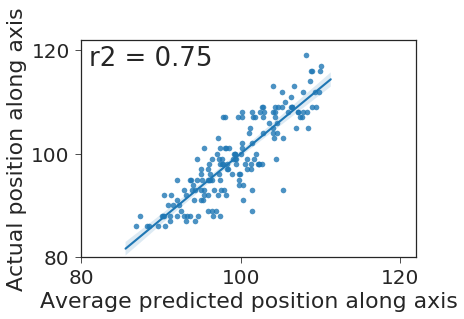

In [55]:
plt.close()
sns.set_context('paper', font_scale=2.5)
sns.set_style('ticks')
sns.regplot(preds.mean(0), y, fit_reg=True)
plt.xlim(80,122)
plt.ylim(80,122)
plt.xticks(range(80,121,20))
plt.yticks(range(80,121,20))
plt.xlabel('Average predicted position along axis')
plt.ylabel('Actual position along axis')
r2 = np.float16(stats.pearsonr(preds.mean(0), y)[0]**2)
plt.text(81, 117,'r2 = %s'%(float('%.2g' % r2)), fontsize=26)
#plt.savefig(os.path.join(fig_dir,'PLS_model.pdf'), 
#            bbox_inches='tight')
plt.show()


#### Which genes are in the top 100 of the sets?
For this section, the user will need to run parts of the next notebook in order to generate the xp spreadsheets for the smaller gene sets

In [57]:
top_100 = pandas.read_csv(os.path.join(wdir,'GSET_top_100_gxp.csv'), index_col=0)
top_600 = pandas.read_csv(os.path.join(wdir,'GSET_top_100_600_gxp.csv'), index_col=0)
top_2700 = pandas.read_csv(os.path.join(wdir,'GSET_top_600_2700_gxp.csv'), index_col=0)

In [62]:
pls_beta = pandas.concat([pandas.Series(pls_mod.coef_[:,0]), probes.gene_symbol], axis=1)
pls_beta.sort_values(0,ascending=False)
pls_t50 = pls_beta.sort_values(0,ascending=False).head(50).index.tolist()
pls_b50 = pls_beta.sort_values(0,ascending=False).head(50).index.tolist()
pls_top100 = pls_t50 + pls_b50
print('n in gene set 1', len([x for x in pls_top100 if x in top_100.index]))
print('n in gene set 1 + 2', len([x for x in pls_top100 if x in top_600.index.tolist() + top_100.index.tolist()]))
print('n in gene set 1 + 2 + 3', len([x for x in pls_top100 if x in top_2700.index.tolist() + top_600.index.tolist() + top_100.index.tolist()]))

n in gene set 1 50
n in gene set 1 + 2 92
n in gene set 1 + 2 + 3 100


# Revision: Top univariate correlated features with axis location

To match with previous analysis, we will need to split into folds. We will identify the top 100 correlated features, and use linear models to predict the unseen samples with the data. We will also compare the top features of each fold with the top features across the whole dataset

#### Find top correlations across entire dataset

In [63]:
corrs = pandas.DataFrame(index = xp.index)

In [64]:
# big dumb for loop
for i in xp.index:
    r,p = stats.pearsonr(xp.loc[i,:], 
                         df.position_along_hipp_AP_axis.values)
    corrs.loc[i,'r'] = r
    corrs.loc[i,'p'] = p
    if i % 1000 == 0:
        print('finished',i)

finished 0
finished 1000
finished 2000
finished 3000
finished 4000
finished 5000
finished 6000
finished 7000
finished 8000
finished 9000
finished 10000
finished 11000
finished 12000
finished 13000
finished 14000
finished 15000
finished 16000
finished 17000
finished 18000
finished 19000
finished 20000
finished 21000
finished 22000
finished 23000
finished 24000
finished 25000
finished 26000
finished 27000
finished 28000
finished 29000
finished 30000
finished 31000
finished 32000
finished 33000
finished 34000
finished 35000
finished 36000
finished 37000
finished 38000
finished 39000
finished 40000
finished 41000
finished 42000
finished 43000
finished 44000
finished 45000
finished 46000
finished 47000
finished 48000
finished 49000
finished 50000
finished 51000
finished 52000
finished 53000
finished 54000
finished 55000
finished 56000
finished 57000
finished 58000


In [65]:
corrs.loc[:,'gene_symbol'] = probes.gene_symbol.values
corrs.sort_values('r',ascending=False)

,r,p,gene_symbol
40112,0.667834,2.603221e-23,NR2F2
23274,0.630898,2.944787e-20,RSPH9
14245,0.610638,9.467063e-19,SYTL2
35503,0.609768,1.092712e-18,NR2F2
40987,0.597917,7.389432e-18,NR2F2
41473,0.595901,1.014821e-17,CADM1
14246,0.593323,1.517873e-17,SYTL2
20529,0.570998,4.287417e-16,LYPD1
35268,0.567512,7.062665e-16,CADM1
24685,0.565194,9.810554e-16,PYDC1


In [66]:
# Compare to top 100 genes from LASSO-PCR approach
top_corrs = corrs.sort_values('r',ascending=False
                             ).index[:50].tolist()
top_corrs += corrs.sort_values('r', ascending=True
                              ).index[:50].tolist()

mod_genes = pandas.read_csv(os.path.join(wdir, 'MAIN_model_genes_of_importance.csv'),
                           index_col=0)
mod_genes.index = mod_genes.probe_ind.values

overlap = [x for x in top_corrs if x in mod_genes[mod_genes.step==1].probe_ind.values]
len(overlap)

26

In [67]:
mod_genes.loc[overlap,'ant-post'].value_counts()

anterior     16
posterior    10
Name: ant-post, dtype: int64

In [68]:
mod_genes.loc[overlap]

,probe_ind,ant-post,step,gene_symbol
40112,40112,anterior,1,NR2F2
23274,23274,anterior,1,RSPH9
14245,14245,anterior,1,SYTL2
35503,35503,anterior,1,NR2F2
40987,40987,anterior,1,NR2F2
14246,14246,anterior,1,SYTL2
20529,20529,anterior,1,LYPD1
24685,24685,anterior,1,PYDC1
14244,14244,anterior,1,SYTL2
51984,51984,anterior,1,A_23_P213527


In [132]:
# Compare to PLS

overlap = [x for x in top_corrs if x in pls_top100]
len(overlap)

21

#### Run 10-fold CV with correlation feature selection and linear models

running PCA
transforming data
performing model cross-validation
using basic 10-fold cross-validation


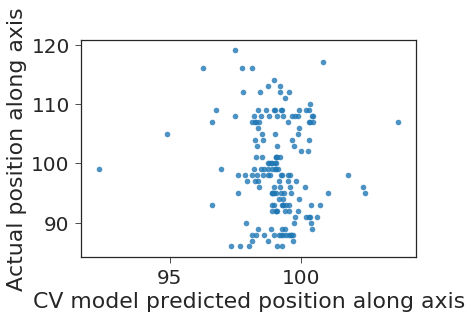

model cv score: r2 =  0.006745735371818252
running final model
final model fit r2 =  1.0


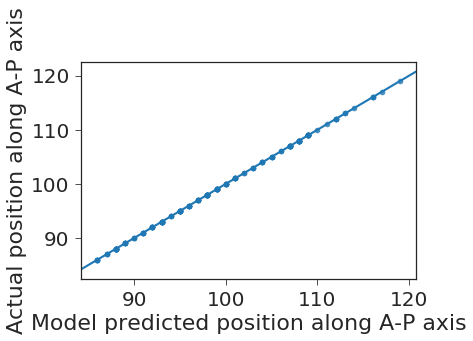

running sanity_check


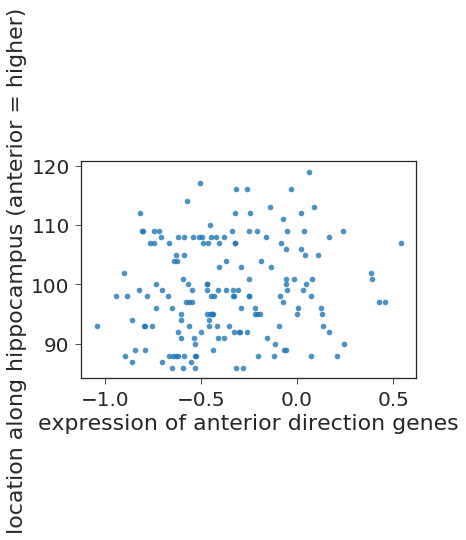

anterior 100 genes vs. y:  r2 = 0.019089997868084956, p = 0.07236608646574935 




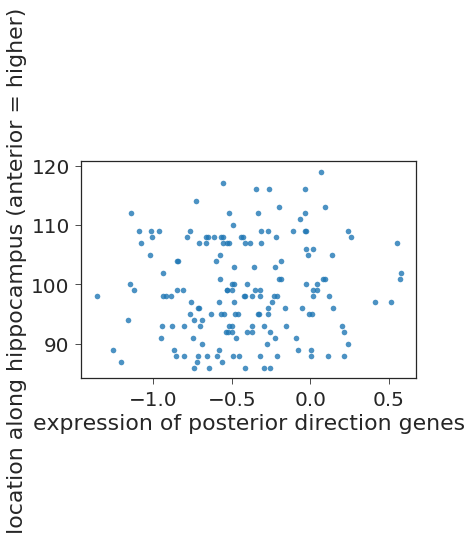

posterior 100 genes vs. y:  r2 = 0.005744028364799821, p = 0.3259543293287667 




In [70]:
pcalr_out_LM = hap.PCA_LR_pipeline(xp.values.T, # X (Gene expression)
                                    df.position_along_hipp_AP_axis, # Y (Location on axis)
                                    clf= linear_model.LinearRegression(normalize=True),
                                    cv_strategy='score', # Show the 10-fold CV score
                                    illustrative=True, # Show plots
                                    test_gene_num = [100],
                                    sanity_check_style = 'separate') # post. and ant. separate

#### Instead try a LASSO model, selecting the top 100, 600 or 2700 features from the correlation anaylsis

In [71]:
from sklearn.model_selection import KFold

f_sets = {}

rs = KFold(n_splits=10, shuffle=True, random_state=123)
preds = dict(zip([100],
                 [pandas.DataFrame(index = xp.columns),
                  pandas.DataFrame(index = xp.columns),
                  pandas.DataFrame(index = xp.columns)]))

fold=0
for tr_ind, te_ind in rs.split(xp.T):
    print('working on fold',fold)
    tr_cols = xp.columns[tr_ind]
    tr_set = pandas.DataFrame(xp[tr_cols], copy=True)
    tr_y = df.loc[tr_ind, 'position_along_hipp_AP_axis'].values
    te_cols = xp.columns[te_ind]
    te_set = pandas.DataFrame(xp[te_cols], copy=True)
    te_y = df.loc[te_ind, 'position_along_hipp_AP_axis'].values
    
    for i in tr_set.index:
        r,p = stats.pearsonr(tr_set.loc[i,:], tr_y)
        corrs.loc[i,'fold%s_r'%fold] = r
    for n in [100]: # 600, 2700
        half = int(n/2)
        top_fs = corrs.sort_values('fold%s_r'%fold,
                                   ascending=False
                             ).index[:half].tolist()
        top_fs += corrs.sort_values('fold%s_r'%fold, 
                                    ascending=True
                                      ).index[:half].tolist()
        f_sets.update({'fold%s_top%s'%(fold,n): top_fs})

        model = linear_model.LinearRegression(normalize=True)
        model.fit(tr_set.loc[top_fs].T,tr_y)
        
        preds[n].loc[te_cols,'prediction'] = model.predict(te_set.loc[top_fs].T)
    fold += 1


working on fold 0
working on fold 1
working on fold 2
working on fold 3
working on fold 4
working on fold 5
working on fold 6
working on fold 7
working on fold 8
working on fold 9


In [78]:
for n in preds.keys():
    print(n)
    print(stats.pearsonr(preds[n].prediction.values,
                         df.position_along_hipp_AP_axis.values
                        )[0]**2)

100
0.4274114316329469


#### What about if we use this gene set with the Lasso instead


In [134]:
lm_gset = xp.loc[top_corrs]
main_set = xp.loc[mod_genes[mod_genes.step==1].probe_ind.values]
pls_set = xp.loc[pls_top100]

lm_accs = hap.bootstrap_model(lm_gset, xp, df.position_along_hipp_AP_axis, smallset=True)
main_accs = hap.bootstrap_model(main_set, xp, df.position_along_hipp_AP_axis, smallset=True)
pls_accs = hap.bootstrap_model(pls_set, xp, df.position_along_hipp_AP_axis, smallset=True)


performing model cross-validation
using basic 10-fold cross-validation
model cv score: r2 =  0.646601210604
running final model
final model fit r2 =  0.797288474499
running sanity_check
>>>>finished round 0<<<<
performing model cross-validation
using basic 10-fold cross-validation
model cv score: r2 =  0.584699891903
running final model
final model fit r2 =  0.771694893886
running sanity_check
>>>>finished round 1<<<<
performing model cross-validation
using basic 10-fold cross-validation
model cv score: r2 =  0.644317909497
running final model
final model fit r2 =  0.766171523233
running sanity_check
>>>>finished round 2<<<<
performing model cross-validation
using basic 10-fold cross-validation
model cv score: r2 =  0.608579764955
running final model
final model fit r2 =  0.749302449712
running sanity_check
>>>>finished round 3<<<<
performing model cross-validation
using basic 10-fold cross-validation
model cv score: r2 =  0.592662525954
running final model
final model fit r2 =  0.7536

#### Plot the comparison

In [135]:
comparison = pandas.concat([pandas.Series(['MAIN']*10 + ['LM']*10 + ['PLS']*10),
                            pandas.Series(main_accs + lm_accs + pls_accs)],
                           axis=1)
comparison.columns = ['Model','Accuracy']

In [136]:
from matplotlib.cm import get_cmap
jnk = get_cmap('tab10_r')


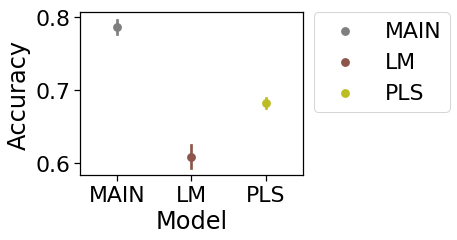

In [152]:
sns.set_context('notebook', font_scale=2)
plt.close()
plt.subplots(figsize=(4,3))
sns.pointplot(x='Model',y='Accuracy',data=comparison,linestyles='',hue='Model', 
              palette=[jnk(2),jnk(4),jnk(1)])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(fig_dir,'ModelComp_Acc.pdf'),
           bbox_inches = 'tight')
plt.show()

#### For comparison, run linear models using the gene sets from LassoPCR, Correlation, PLS

In [127]:
def bootstrap_linear_model(gene_set, all_genes, y, n_iterations=10, 
                           bs_type='bootstrap', inner_set=100, 
                           random_state = 123):

    np.random.seed(random_state)

    results = []
    for i in range(n_iterations):
        if bs_type == 'bootstrap':
            rand_samp = np.random.randint(0,len(gene_set.index),len(gene_set))
            X = gene_set.loc[gene_set.index[rand_samp]].values.T
        elif bs_type == 'null':
            rand_samp = np.random.randint(0,len(all_genes),len(gene_set))
            X = all_genes.loc[all_genes.index[rand_samp]].values.T
        elif bs_type == 'inner_set':
            rand_samp = np.random.randint(0,len(gene_set.index),inner_set)
            X = gene_set.loc[gene_set.index[rand_samp]].values.T
        jnk = hap.PCA_LR_pipeline(X, y, cv_strategy='score', illustrative=False,
                                  clf = linear_model.LinearRegression(normalize=True),
                                  sanity_check_style ='model')
        results.append(jnk['CV_scores'])

        print('>>>>finished round %s<<<<'%i)
        
    return(results)


In [128]:
lm_accs = bootstrap_linear_model(lm_gset, xp, df.position_along_hipp_AP_axis)
main_accs = bootstrap_linear_model(main_set, xp, df.position_along_hipp_AP_axis)
pls_accs = bootstrap_linear_model(pls_set, xp, df.position_along_hipp_AP_axis)

running PCA
transforming data
performing model cross-validation
using basic 10-fold cross-validation
model cv score: r2 =  0.43587516712
running final model
final model fit r2 =  0.912465773376
running sanity_check
>>>>finished round 0<<<<
running PCA
transforming data
performing model cross-validation
using basic 10-fold cross-validation
model cv score: r2 =  0.296035644009
running final model
final model fit r2 =  0.897110958584
running sanity_check
>>>>finished round 1<<<<
running PCA
transforming data
performing model cross-validation
using basic 10-fold cross-validation
model cv score: r2 =  0.32198874171
running final model
final model fit r2 =  0.884089466723
running sanity_check
>>>>finished round 2<<<<
running PCA
transforming data
performing model cross-validation
using basic 10-fold cross-validation
model cv score: r2 =  0.400373628453
running final model
final model fit r2 =  0.896407168741
running sanity_check
>>>>finished round 3<<<<
running PCA
transforming data
performi

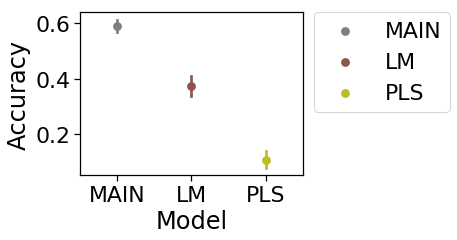

In [133]:
comparison = pandas.concat([pandas.Series(['MAIN']*10 + ['LM']*10 + ['PLS']*10),
                            pandas.Series(main_accs + lm_accs + pls_accs)],
                           axis=1)
comparison.columns = ['Model','Accuracy']

from matplotlib.cm import get_cmap
jnk = get_cmap('tab10_r')


sns.set_context('notebook', font_scale=2)
plt.close()
plt.subplots(figsize=(4,3))
sns.pointplot(x='Model',y='Accuracy',data=comparison,linestyles='',hue='Model', 
              palette=[jnk(2),jnk(4),jnk(1)])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(fig_dir,'ModelComp_LM_ACC.pdf'),
           bbox_inches = 'tight')
plt.show()

In [ ]:
# What about if we use this gene set with the Lasso
lm_gset = xp.loc[top_corrs]
main_set = xp.loc[mod_genes[mod_genes.step==1].probe_ind.values]
pls_set = xp.loc[pls_top100]

lm_accs = hap.bootstrap_model(lm_gset, xp, df.position_along_hipp_AP_axis, smallset=True)
main_accs = hap.bootstrap_model(main_set, xp, df.position_along_hipp_AP_axis, smallset=True)
pls_accs = hap.bootstrap_model(pls_set, xp, df.position_along_hipp_AP_axis, smallset=True)


#### Compare the genes from each set

In [67]:
lm_hits = list(np.unique(probes.loc[top_corrs,'gene_symbol'].values))
pls_hits = list(np.unique(probes.loc[pls_genes.index,'gene_symbol'].values))
main_hits = list(mod_genes[mod_genes.step==1]['gene_symbol'].unique())


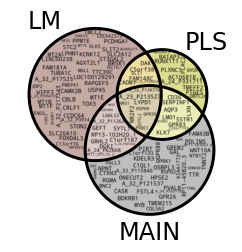

In [132]:
import matplotlib_venn_wordcloud

plt.close()
matplotlib_venn_wordcloud.venn3_wordcloud([set(lm_hits), set(pls_hits), set(main_hits)],
                                         set_labels = ('LM','PLS','MAIN'),
                                         set_colors = [jnk(4),jnk(1),jnk(2)],
                                         alpha=0.5
                                         )
plt.savefig(os.path.join(fig_dir,'ModelComp_Venn.pdf'),
           bbox_inches = 'tight')
plt.show()

In [141]:
# Overlap across all three solutions

model3_overlap = list(set(lm_hits) & set(pls_hits) & set(main_hits))
model3_overlap.remove('A_23_P213527')
model3_overlap.append('GPR50')
model3_overlap.remove('A_32_P136776')

In [142]:
model3_overlap

['NRG1', 'PYDC1', 'SYTL2', 'RSPH9', 'NR2F2', 'LYPD1', 'GPR39', 'GPR50']

In [146]:
probes[probes.gene_symbol.isin(model3_overlap)]['gene_name'].unique()

array(['G protein-coupled receptor 39', 'G protein-coupled receptor 50',
       'synaptotagmin-like 2', 'LY6/PLAUR domain containing 1',
       'radial spoke head 9 homolog (Chlamydomonas)',
       'PYD (pyrin domain) containing 1', 'neuregulin 1',
       'nuclear receptor subfamily 2, group F, member 2'], dtype=object)

#### Gather all the info for a supplementary table

In [133]:
cols = ['probe_id','gene_symbol','gene_name']

# MAIN
idx = mod_genes[mod_genes.step==1].index
bdf = probes.loc[idx,cols]
bdf.loc[:,'beta'] = pcalr_out_NEW['betas'][idx]
bdf.to_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NCRevisions/Table_SMain.csv')

# PLS
idx = pls_top100
bdf = probes.loc[idx,cols]
bdf.loc[:,'beta'] = pls_out['betas'][idx][:,0]
bdf.to_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NCRevisions/Table_SPLS.csv')

# Corr
idx = top_corrs
bdf = probes.loc[idx,cols]
bdf.loc[:,'r'] = corrs.loc[idx,'r']
bdf.to_csv('/home/users/jvogel/Science/Allen_Human_Brain_Atlas/NCRevisions/Table_SCorr.csv')


# MAE stuff
To understand where these smaller gene set come from, please see NB3

In [7]:
df = pandas.read_csv(os.path.join(wdir,'MAIN_hippocampus_sample_info_W_SMALL_SETS.csv'))

In [9]:
from sklearn.metrics import mean_absolute_error
for col in df.columns[-5:]:
    mae = mean_absolute_error(y_pred=df[col].values, y_true=df.position_along_hipp_AP_axis.values)
    print('%s: %s'%(col,mae))

top_100: 1.8393416054052683
top_100_600: 2.3860372156611773
top_600_2700: 2.0744665690864563
top_2700_5k: 2.6378407266250328
top_5k_end: 6.723875432525954
